## FORECASTING AFRICAN STOCK MARKETS USING PREDICTIVE ANALYSIS

## 1. Business Understanding

#### 1.1 Project Objective
Build a model that identifies highly correlated stocks and tracks their performance over time. Integrate NLP-based market intelligence to generate predictive insights that help investors understand market sentiment and anticipate trends.

#### 1.2 Problem Statement
Predictive stock models are common in Western markets, where investors rely on data-driven tools to track correlations and forecast market behavior. African markets lag behind in this area. Many investors lack tools that reveal correlated trends and complex relationships between local stocks. They need a model that combines quantitative market data with qualitative insights from financial news to make informed investment decisions.

#### 1.3 Technical Approach
We will primarily use **time series analysis** to track stock values and identify performance patterns.  
We will apply **NLP techniques** to process financial news and market reports for **sentiment analysis**, capturing public and media sentiment toward specific stocks or sectors.  
Finally, we will use **statistical correlation methods** to cluster stocks that move together, revealing interdependencies and co-movement trends.

**Input:** Historical stock price data and financial news text  
**Output:** A set of correlated stock clusters and predictive trend insights

#### 1.4 Key Challenge
**Sparse Market Data:** Many African stocks lack consistent reporting and media coverage, which limits available market intelligence and can reduce model accuracy. The system must handle incomplete data without losing predictive power.

#### 1.5 Success Metrics
We will evaluate the model using:
- **Prediction Accuracy:** 75% (target)  
- **Correlation Strength (R²):** Measure of how closely identified clusters move together  
- **Sentiment-Performance Alignment:** How well market sentiment predicts price movements  
- **Coverage:** Proportion of stocks included in meaningful clusters  

#### 1.6 Expected Outcomes
The project will deliver a **predictive analytics tool for African markets** that highlights correlated stocks and emerging trends. It will provide insights into **unique stock relationships** across sectors and regions.  
The model will remain **interpretable**, not a black box—every prediction will include justification based on underlying data and sentiment indicators.

## 2. Data Understanding

In [63]:
!pip install yfinance
!pip install statsmodels


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#from prophet import Prophet

STOCK DATASET 

In [65]:
import pandas as pd

# Example path — update this to where your CSV is saved
stock_df = pd.read_csv(r"C:\Users\User\Desktop\stock_data.csv")
stock_df

,symbol,open,high,low,close,volume,ticker,company_name,industry,datetime
0,NSEKE:EGAD,41.75,41.75,41.25,41.25,5500.0,EGAD,Eaagads Ltd,Agricultural,2015-02-23 09:00:00
1,NSEKE:EGAD,40.00,40.00,40.00,40.00,5300.0,EGAD,Eaagads Ltd,Agricultural,2015-02-24 09:00:00
2,NSEKE:EGAD,39.50,39.50,39.00,39.50,4700.0,EGAD,Eaagads Ltd,Agricultural,2015-02-25 09:00:00
3,NSEKE:EGAD,41.25,41.75,39.00,39.00,27600.0,EGAD,Eaagads Ltd,Agricultural,2015-02-26 09:00:00
4,NSEKE:EGAD,41.25,41.25,39.00,39.00,1900.0,EGAD,Eaagads Ltd,Agricultural,2015-03-02 09:00:00
...,...,...,...,...,...,...,...,...,...,...
71881,NSEKE:SCOM,27.85,28.50,27.00,27.90,18716618.0,SCOM,Safaricom Ltd,Telecommunication,2025-10-21 09:00:00
71882,NSEKE:SCOM,27.90,28.10,27.80,28.05,4260285.0,SCOM,Safaricom Ltd,Telecommunication,2025-10-22 09:00:00
71883,NSEKE:SCOM,28.50,28.50,27.95,28.25,8419327.0,SCOM,Safaricom Ltd,Telecommunication,2025-10-23 09:00:00
71884,NSEKE:SCOM,28.50,28.50,28.05,28.50,40614269.0,SCOM,Safaricom Ltd,Telecommunication,2025-10-24 09:00:00


DATASET DESCRIPTION 

Symbol-it is a unique identifier for each listed company on the Nairobi Stock Exchange.

Open - it refers to the price at which the stock opened on that day.

High - refers to the highest traded price during the day .

Low - refers to the lowest traded price during the day.

Close - refers to the final trading price at the clode of the market.

Volume- number of shares which is  traded on the day.

Ticker-it refers to the unique company identifier.

Company_name- it is the official registered name of the firm listed on the nairobi stock exchange.

Industry - it represents the economic category the company operates eg banking and agricultural sectors.

Datetime-it is the exact trading date and time for each record.


In [66]:
#Preview data
print(" First 5 Rows:")
stock_df.head()

 First 5 Rows:


,symbol,open,high,low,close,volume,ticker,company_name,industry,datetime
0,NSEKE:EGAD,41.75,41.75,41.25,41.25,5500.0,EGAD,Eaagads Ltd,Agricultural,2015-02-23 09:00:00
1,NSEKE:EGAD,40.00,40.00,40.00,40.00,5300.0,EGAD,Eaagads Ltd,Agricultural,2015-02-24 09:00:00
2,NSEKE:EGAD,39.50,39.50,39.00,39.50,4700.0,EGAD,Eaagads Ltd,Agricultural,2015-02-25 09:00:00
3,NSEKE:EGAD,41.25,41.75,39.00,39.00,27600.0,EGAD,Eaagads Ltd,Agricultural,2015-02-26 09:00:00
4,NSEKE:EGAD,41.25,41.25,39.00,39.00,1900.0,EGAD,Eaagads Ltd,Agricultural,2015-03-02 09:00:00


In [67]:
# checking the last five rows
print(" Last 5 Rows:")
stock_df.tail()

 Last 5 Rows:


,symbol,open,high,low,close,volume,ticker,company_name,industry,datetime
71881,NSEKE:SCOM,27.85,28.5,27.00,27.90,18716618.0,SCOM,Safaricom Ltd,Telecommunication,2025-10-21 09:00:00
71882,NSEKE:SCOM,27.90,28.1,27.80,28.05,4260285.0,SCOM,Safaricom Ltd,Telecommunication,2025-10-22 09:00:00
71883,NSEKE:SCOM,28.50,28.5,27.95,28.25,8419327.0,SCOM,Safaricom Ltd,Telecommunication,2025-10-23 09:00:00
71884,NSEKE:SCOM,28.50,28.5,28.05,28.50,40614269.0,SCOM,Safaricom Ltd,Telecommunication,2025-10-24 09:00:00
71885,NSEKE:SCOM,28.25,29.0,28.20,28.80,1740579.0,SCOM,Safaricom Ltd,Telecommunication,2025-10-27 09:00:00


OBSERVATION 

The stock dataset is uniform from the start to the end.

In [68]:
# checking the metadata 
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71886 entries, 0 to 71885
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symbol        71886 non-null  object 
 1   open          71886 non-null  float64
 2   high          71886 non-null  float64
 3   low           71886 non-null  float64
 4   close         71886 non-null  float64
 5   volume        71886 non-null  float64
 6   ticker        71886 non-null  object 
 7   company_name  71886 non-null  object 
 8   industry      71886 non-null  object 
 9   datetime      71886 non-null  object 
dtypes: float64(5), object(5)
memory usage: 5.5+ MB


OBSERVATION
 
The stock dataset has five numerical columns and five categorical columns 

In [69]:
# checking the shape of the dataset
print(f"The stock dataset has{stock_df.shape[0]} rows and {stock_df.shape[1]} columns")

The stock dataset has71886 rows and 10 columns


In [70]:
# statistical summary of the numerical column 
stock_df.describe().T


,count,mean,std,min,25%,50%,75%,max
open,71886.0,46.694471,8.779335e+01,0.16,3.3,13.50,38.000000,1200.0
high,71886.0,47.067277,8.828506e+01,0.17,3.4,13.60,38.450001,1200.0
low,71886.0,46.208636,8.716566e+01,0.16,3.2,13.15,37.500000,1200.0
close,71886.0,46.632117,8.771657e+01,0.16,3.3,13.50,38.000000,1200.0
volume,71886.0,329939.919900,2.097939e+06,0.00,1300.0,10300.00,76800.000000,208485900.0


In [71]:
#statistical summary of categorical colums
stock_df.describe(include="object").T


,count,unique,top,freq
symbol,71886,60,NSEKE:EGAD,1300
ticker,71886,60,EGAD,1300
company_name,71886,60,Eaagads Ltd,1300
industry,71886,11,Commercial,14649
datetime,71886,3326,2025-02-19 09:00:00,55


In [72]:
#Checking the null values
print(f"The stock dataset has {stock_df.isna().sum().sum()} null values.")

The stock dataset has 0 null values.


In [73]:
#checking the duplicates 
print(f"The stock dataset has {stock_df.duplicated().sum()} duplicates.")

The stock dataset has 0 duplicates.


<Axes: >

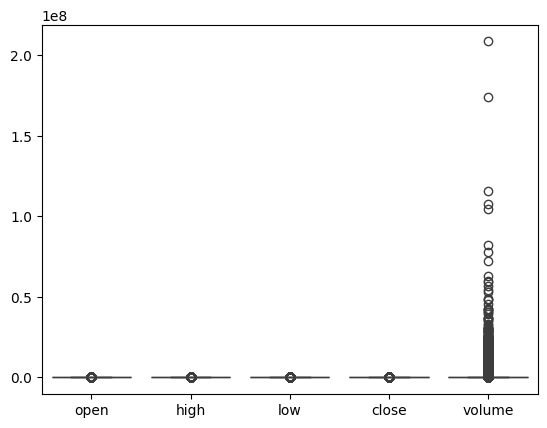

In [74]:
#checking for outliers
sns.boxplot(stock_df)

In [ ]:
# Step 1: Calculate IQR bounds
Q1 = stock_df['volume'].quantile(0.25)
Q3 = stock_df['volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Replace outliers with median
median = stock_df['volume'].median()
stock_df.loc[(stock_df['volume'] < lower_bound) | (stock_df['volume'] > upper_bound), 'volume'] = median

<Axes: >

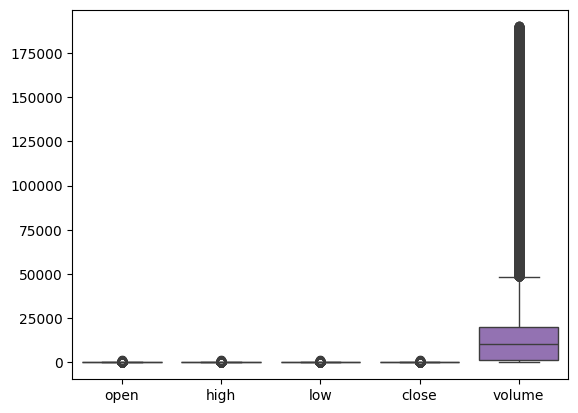

In [76]:
sns.boxplot(stock_df)

Observation

The volume column has a significant number of outliers represented by the individual points above the upper whisker of the box plot.This clearly illustrates there were many instances of high trading volume compared to the typical range.

DATA PREPARATION 

Data Cleaning